# Import the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  

Loading the Dataset

In [2]:
df=pd.read_csv('titanic.csv')

# Understanding the data

In [3]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')

In [4]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


1. handle missing values in age(mean),fare-1 (mean),cabin (remove),embarked-2 (mode)
2. invalid datatype (no columns)

# Data Cleaning

In [6]:
df.duplicated().any()

np.False_

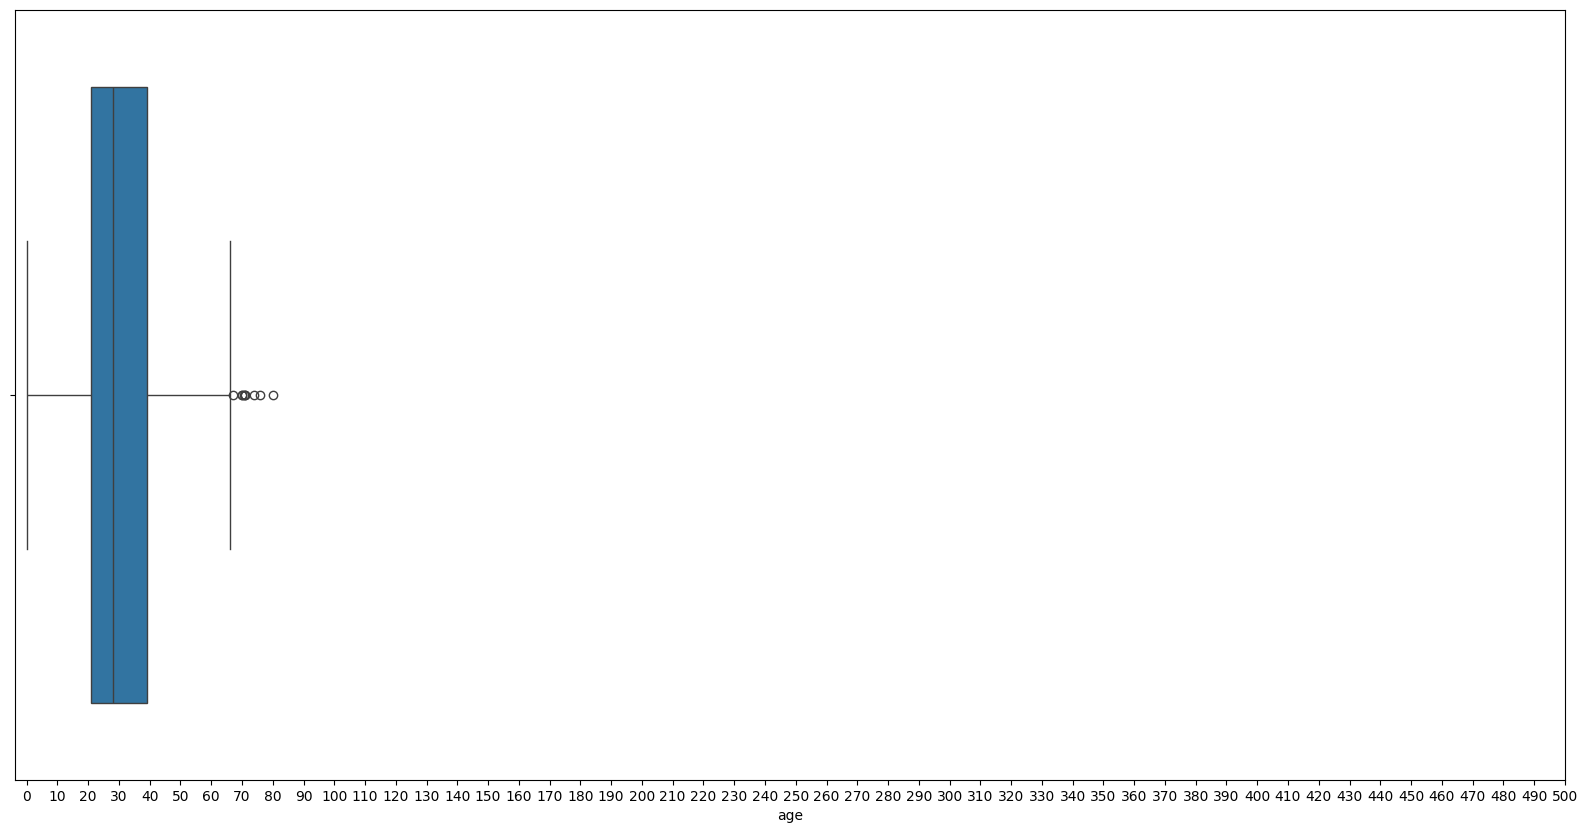

In [7]:
plt.figure(figsize=(20,10))
sns.boxplot(df,x='age')
plt.xticks(np.arange(0,501,10))
plt.show()

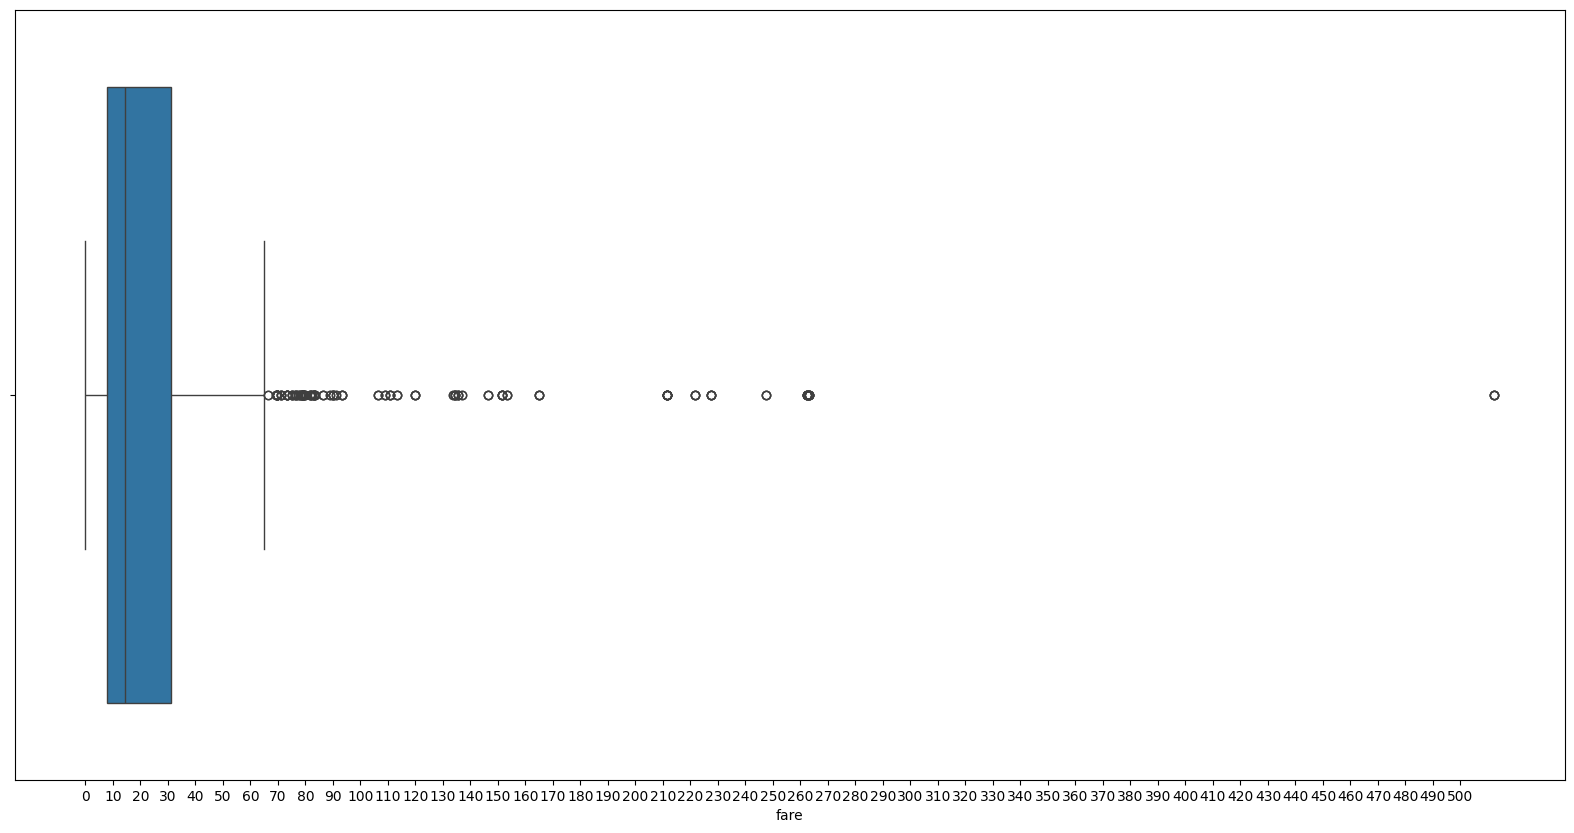

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot(df,x='fare')
plt.xticks(np.arange(0,501,10))
plt.show()

In [9]:
a_me=df['age'].median()    #np.float64(29.8811345124283)
f_me=df['fare'].median()   #np.float64(33.29547928134557)
e_mo=df['embarked'].mode()[0]    #'S'
#df.drop(columns=['cabin'])

In [10]:
df['age']=df['age'].fillna(a_me)
df['fare']=df['fare'].fillna(f_me)
df['embarked']=df['embarked'].fillna(e_mo)
df.drop(columns=['cabin'])

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0


1. handle missing values in age(mean),fare-1 (mean),cabin (remove),embarked-2 (mode)
2. invalid datatype (no columns)

In [11]:
#df=df.astype({'age':int,'fare':int})

# Data Transformation

Note : Data Transformation is also known as Feature Engineering

In [12]:
df['age']=df['age'].round(1)
df['fare']=df['fare'].round(1)

In [13]:
df['family_cnt']=df['sibsp']+df['parch']
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,family_cnt
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3,B5,S,1,0
1,1,"Allison, Master. Hudson Trevor",male,0.9,1,2,113781,151.6,C22 C26,S,1,3
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.6,C22 C26,S,0,3
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.6,C22 C26,S,0,3
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.6,C22 C26,S,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.5,NaN,C,0,1
1305,3,"Zabour, Miss. Thamine",female,28.0,1,0,2665,14.5,NaN,C,0,1
1306,3,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2,NaN,C,0,0
1307,3,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2,NaN,C,0,0


In [14]:
df=df.drop(columns=['sibsp','parch'])
df

,pclass,name,sex,age,ticket,fare,cabin,embarked,survived,family_cnt
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,24160,211.3,B5,S,1,0
1,1,"Allison, Master. Hudson Trevor",male,0.9,113781,151.6,C22 C26,S,1,3
2,1,"Allison, Miss. Helen Loraine",female,2.0,113781,151.6,C22 C26,S,0,3
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,113781,151.6,C22 C26,S,0,3
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,113781,151.6,C22 C26,S,0,3
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5,2665,14.5,NaN,C,0,1
1305,3,"Zabour, Miss. Thamine",female,28.0,2665,14.5,NaN,C,0,1
1306,3,"Zakarian, Mr. Mapriededer",male,26.5,2656,7.2,NaN,C,0,0
1307,3,"Zakarian, Mr. Ortin",male,27.0,2670,7.2,NaN,C,0,0


In [15]:
df['embarked'].unique()
#C = Cherbourg; Q = Queenstown; S = Southampton

array(['S', 'C', 'Q'], dtype=object)

In [16]:
df['embarked']=df['embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
df

,pclass,name,sex,age,ticket,fare,cabin,embarked,survived,family_cnt
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,24160,211.3,B5,Southampton,1,0
1,1,"Allison, Master. Hudson Trevor",male,0.9,113781,151.6,C22 C26,Southampton,1,3
2,1,"Allison, Miss. Helen Loraine",female,2.0,113781,151.6,C22 C26,Southampton,0,3
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,113781,151.6,C22 C26,Southampton,0,3
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,113781,151.6,C22 C26,Southampton,0,3
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5,2665,14.5,NaN,Cherbourg,0,1
1305,3,"Zabour, Miss. Thamine",female,28.0,2665,14.5,NaN,Cherbourg,0,1
1306,3,"Zakarian, Mr. Mapriededer",male,26.5,2656,7.2,NaN,Cherbourg,0,0
1307,3,"Zakarian, Mr. Ortin",male,27.0,2670,7.2,NaN,Cherbourg,0,0


In [17]:
df=df.rename(columns={'sex':'gender'})
df

,pclass,name,gender,age,ticket,fare,cabin,embarked,survived,family_cnt
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,24160,211.3,B5,Southampton,1,0
1,1,"Allison, Master. Hudson Trevor",male,0.9,113781,151.6,C22 C26,Southampton,1,3
2,1,"Allison, Miss. Helen Loraine",female,2.0,113781,151.6,C22 C26,Southampton,0,3
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,113781,151.6,C22 C26,Southampton,0,3
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,113781,151.6,C22 C26,Southampton,0,3
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5,2665,14.5,NaN,Cherbourg,0,1
1305,3,"Zabour, Miss. Thamine",female,28.0,2665,14.5,NaN,Cherbourg,0,1
1306,3,"Zakarian, Mr. Mapriededer",male,26.5,2656,7.2,NaN,Cherbourg,0,0
1307,3,"Zakarian, Mr. Ortin",male,27.0,2670,7.2,NaN,Cherbourg,0,0


In [18]:
df['gender']=df['gender'].str.title()
df

,pclass,name,gender,age,ticket,fare,cabin,embarked,survived,family_cnt
0,1,"Allen, Miss. Elisabeth Walton",Female,29.0,24160,211.3,B5,Southampton,1,0
1,1,"Allison, Master. Hudson Trevor",Male,0.9,113781,151.6,C22 C26,Southampton,1,3
2,1,"Allison, Miss. Helen Loraine",Female,2.0,113781,151.6,C22 C26,Southampton,0,3
3,1,"Allison, Mr. Hudson Joshua Creighton",Male,30.0,113781,151.6,C22 C26,Southampton,0,3
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0,113781,151.6,C22 C26,Southampton,0,3
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",Female,14.5,2665,14.5,NaN,Cherbourg,0,1
1305,3,"Zabour, Miss. Thamine",Female,28.0,2665,14.5,NaN,Cherbourg,0,1
1306,3,"Zakarian, Mr. Mapriededer",Male,26.5,2656,7.2,NaN,Cherbourg,0,0
1307,3,"Zakarian, Mr. Ortin",Male,27.0,2670,7.2,NaN,Cherbourg,0,0


In [19]:
df['l_name']=df['name'].str.split(',', expand=True)[0]
df

,pclass,name,gender,age,ticket,fare,cabin,embarked,survived,family_cnt,l_name
0,1,"Allen, Miss. Elisabeth Walton",Female,29.0,24160,211.3,B5,Southampton,1,0,Allen
1,1,"Allison, Master. Hudson Trevor",Male,0.9,113781,151.6,C22 C26,Southampton,1,3,Allison
2,1,"Allison, Miss. Helen Loraine",Female,2.0,113781,151.6,C22 C26,Southampton,0,3,Allison
3,1,"Allison, Mr. Hudson Joshua Creighton",Male,30.0,113781,151.6,C22 C26,Southampton,0,3,Allison
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0,113781,151.6,C22 C26,Southampton,0,3,Allison
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",Female,14.5,2665,14.5,NaN,Cherbourg,0,1,Zabour
1305,3,"Zabour, Miss. Thamine",Female,28.0,2665,14.5,NaN,Cherbourg,0,1,Zabour
1306,3,"Zakarian, Mr. Mapriededer",Male,26.5,2656,7.2,NaN,Cherbourg,0,0,Zakarian
1307,3,"Zakarian, Mr. Ortin",Male,27.0,2670,7.2,NaN,Cherbourg,0,0,Zakarian


In [20]:
temp=df['name'].str.split(',', expand=True)[1]

df[['title','f_name']]=temp.str.split('.',n=1, expand=True)
df

,pclass,name,gender,age,ticket,fare,cabin,embarked,survived,family_cnt,l_name,title,f_name
0,1,"Allen, Miss. Elisabeth Walton",Female,29.0,24160,211.3,B5,Southampton,1,0,Allen,Miss,Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",Male,0.9,113781,151.6,C22 C26,Southampton,1,3,Allison,Master,Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",Female,2.0,113781,151.6,C22 C26,Southampton,0,3,Allison,Miss,Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",Male,30.0,113781,151.6,C22 C26,Southampton,0,3,Allison,Mr,Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0,113781,151.6,C22 C26,Southampton,0,3,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",Female,14.5,2665,14.5,NaN,Cherbourg,0,1,Zabour,Miss,Hileni
1305,3,"Zabour, Miss. Thamine",Female,28.0,2665,14.5,NaN,Cherbourg,0,1,Zabour,Miss,Thamine
1306,3,"Zakarian, Mr. Mapriededer",Male,26.5,2656,7.2,NaN,Cherbourg,0,0,Zakarian,Mr,Mapriededer
1307,3,"Zakarian, Mr. Ortin",Male,27.0,2670,7.2,NaN,Cherbourg,0,0,Zakarian,Mr,Ortin


In [21]:
df['age'].min()     #0.2
df['age'].max()     #80.0

df['age_category']=pd.cut(df['age'],bins=[0,3,15,25,60,81], labels=['baby','child','teen','adult','senior'])

# Data Analysis

In [22]:
g=df['ticket'].value_counts()
g==1
g[g==1]
solo_tickets=g[g==1].index

def f1(d):
    if d['family_cnt']>0:
        return 'family'
    else:
        if d['ticket']in(solo_tickets):
            return 'solo'
        else:
            return 'friends'

# def fun(d):
#     if d['family_cnt']>0:
#         return 'Family'
#     else:
#         return 'Solo'
    
df['companion_type']=df.apply(f1,axis=1)

df

,pclass,name,gender,age,ticket,fare,cabin,embarked,survived,family_cnt,l_name,title,f_name,age_category,companion_type
0,1,"Allen, Miss. Elisabeth Walton",Female,29.0,24160,211.3,B5,Southampton,1,0,Allen,Miss,Elisabeth Walton,adult,friends
1,1,"Allison, Master. Hudson Trevor",Male,0.9,113781,151.6,C22 C26,Southampton,1,3,Allison,Master,Hudson Trevor,baby,family
2,1,"Allison, Miss. Helen Loraine",Female,2.0,113781,151.6,C22 C26,Southampton,0,3,Allison,Miss,Helen Loraine,baby,family
3,1,"Allison, Mr. Hudson Joshua Creighton",Male,30.0,113781,151.6,C22 C26,Southampton,0,3,Allison,Mr,Hudson Joshua Creighton,adult,family
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0,113781,151.6,C22 C26,Southampton,0,3,Allison,Mrs,Hudson J C (Bessie Waldo Daniels),teen,family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",Female,14.5,2665,14.5,NaN,Cherbourg,0,1,Zabour,Miss,Hileni,child,family
1305,3,"Zabour, Miss. Thamine",Female,28.0,2665,14.5,NaN,Cherbourg,0,1,Zabour,Miss,Thamine,adult,family
1306,3,"Zakarian, Mr. Mapriededer",Male,26.5,2656,7.2,NaN,Cherbourg,0,0,Zakarian,Mr,Mapriededer,adult,solo
1307,3,"Zakarian, Mr. Ortin",Male,27.0,2670,7.2,NaN,Cherbourg,0,0,Zakarian,Mr,Ortin,adult,solo


In [23]:
df.columns

Index(['pclass', 'name', 'gender', 'age', 'ticket', 'fare', 'cabin',
       'embarked', 'survived', 'family_cnt', 'l_name', 'title', 'f_name',
       'age_category', 'companion_type'],
      dtype='object')

In [24]:
lst=['ticket','title','f_name','l_name','gender', 'age','companion_type','family_cnt','pclass','embarked','fare','survived']

In [25]:
df=df[lst]
df

,ticket,title,f_name,l_name,gender,age,companion_type,family_cnt,pclass,embarked,fare,survived
0,24160,Miss,Elisabeth Walton,Allen,Female,29.0,friends,0,1,Southampton,211.3,1
1,113781,Master,Hudson Trevor,Allison,Male,0.9,family,3,1,Southampton,151.6,1
2,113781,Miss,Helen Loraine,Allison,Female,2.0,family,3,1,Southampton,151.6,0
3,113781,Mr,Hudson Joshua Creighton,Allison,Male,30.0,family,3,1,Southampton,151.6,0
4,113781,Mrs,Hudson J C (Bessie Waldo Daniels),Allison,Female,25.0,family,3,1,Southampton,151.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2665,Miss,Hileni,Zabour,Female,14.5,family,1,3,Cherbourg,14.5,0
1305,2665,Miss,Thamine,Zabour,Female,28.0,family,1,3,Cherbourg,14.5,0
1306,2656,Mr,Mapriededer,Zakarian,Male,26.5,solo,0,3,Cherbourg,7.2,0
1307,2670,Mr,Ortin,Zakarian,Male,27.0,solo,0,3,Cherbourg,7.2,0


In [51]:
df=df.sort_values(by='ticket',ascending=True)  #ascending=False - descending order

In [27]:
df=df.reset_index(drop=True)
df

,ticket,title,f_name,l_name,gender,age,companion_type,family_cnt,pclass,embarked,fare,survived
0,110152,Miss,Gladys,Cherry,Female,30.0,friends,0,1,Southampton,86.5,1
1,110152,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,Female,33.0,friends,0,1,Southampton,86.5,1
2,110152,Miss,Roberta,Maioni,Female,16.0,friends,0,1,Southampton,86.5,1
3,110413,Miss,Ruth,Taussig,Female,18.0,family,2,1,Southampton,79.6,1
4,110413,Mrs,Emil (Tillie Mandelbaum),Taussig,Female,39.0,family,2,1,Southampton,79.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,W.E.P. 5734,Mrs,Herbert Fuller (Carrie Constance Toogood),Chaffee,Female,47.0,family,1,1,Southampton,61.2,1
1305,W.E.P. 5734,Mr,Herbert Fuller,Chaffee,Male,46.0,family,1,1,Southampton,61.2,0
1306,W/C 14208,Mr,Walter,Harris,Male,30.0,solo,0,2,Southampton,10.5,0
1307,WE/P 5735,Capt,Edward Gifford,Crosby,Male,70.0,family,2,1,Southampton,71.0,0


# Conclusion

1.Get all the passegers details

In [28]:
df

,ticket,title,f_name,l_name,gender,age,companion_type,family_cnt,pclass,embarked,fare,survived
0,110152,Miss,Gladys,Cherry,Female,30.0,friends,0,1,Southampton,86.5,1
1,110152,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,Female,33.0,friends,0,1,Southampton,86.5,1
2,110152,Miss,Roberta,Maioni,Female,16.0,friends,0,1,Southampton,86.5,1
3,110413,Miss,Ruth,Taussig,Female,18.0,family,2,1,Southampton,79.6,1
4,110413,Mrs,Emil (Tillie Mandelbaum),Taussig,Female,39.0,family,2,1,Southampton,79.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,W.E.P. 5734,Mrs,Herbert Fuller (Carrie Constance Toogood),Chaffee,Female,47.0,family,1,1,Southampton,61.2,1
1305,W.E.P. 5734,Mr,Herbert Fuller,Chaffee,Male,46.0,family,1,1,Southampton,61.2,0
1306,W/C 14208,Mr,Walter,Harris,Male,30.0,solo,0,2,Southampton,10.5,0
1307,WE/P 5735,Capt,Edward Gifford,Crosby,Male,70.0,family,2,1,Southampton,71.0,0


2. Get all the passengers name (full name)

In [29]:
df['f_name']+' '+df['l_name']

0                                           Gladys Cherry
1               of (Lucy Noel Martha Dyer-Edwards) Rothes
2                                          Roberta Maioni
3                                            Ruth Taussig
4                        Emil (Tillie Mandelbaum) Taussig
                              ...                        
1304     Herbert Fuller (Carrie Constance Toogood) Cha...
1305                               Herbert Fuller Chaffee
1306                                        Walter Harris
1307                                Edward Gifford Crosby
1308                                     Harriet R Crosby
Length: 1309, dtype: object

3. Get all the passengers name,gender,age

In [30]:
# lst=['f_name','l_name','age']
# df[lst]

#or

df[['f_name','l_name','age']]

,f_name,l_name,age
0,Gladys,Cherry,30.0
1,of (Lucy Noel Martha Dyer-Edwards),Rothes,33.0
2,Roberta,Maioni,16.0
3,Ruth,Taussig,18.0
4,Emil (Tillie Mandelbaum),Taussig,39.0
...,...,...,...
1304,Herbert Fuller (Carrie Constance Toogood),Chaffee,47.0
1305,Herbert Fuller,Chaffee,46.0
1306,Walter,Harris,30.0
1307,Edward Gifford,Crosby,70.0


4. get male passenger list

In [31]:
#df.query("gender=='Male'")

#Or

df.loc[df['gender']=='Male']

,ticket,title,f_name,l_name,gender,age,companion_type,family_cnt,pclass,embarked,fare,survived
5,110413,Mr,Emil,Taussig,Male,52.0,family,2,1,Southampton,79.6,0
6,110465,Mr,Walter Chamberlain,Porter,Male,47.0,friends,0,1,Southampton,52.0,0
7,110465,Mr,George Quincy,Clifford,Male,28.0,friends,0,1,Southampton,52.0,0
8,110469,Mr,John Edward,Maguire,Male,30.0,solo,0,1,Southampton,26.0,0
9,110489,Mr,John James,Borebank,Male,42.0,solo,0,1,Southampton,26.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,W./C. 6608,Mr,William Neal,Ford,Male,16.0,family,4,3,Southampton,34.4,0
1302,W./C. 6608,Mr,Edward Watson,Ford,Male,18.0,family,4,3,Southampton,34.4,0
1305,W.E.P. 5734,Mr,Herbert Fuller,Chaffee,Male,46.0,family,1,1,Southampton,61.2,0
1306,W/C 14208,Mr,Walter,Harris,Male,30.0,solo,0,2,Southampton,10.5,0


5. get female passenger name and passenger class

In [32]:
#df.loc[df['gender']=='Female',['f_name','pclass']]

#or

df.query("gender=='Female'") [['f_name','pclass']]

,f_name,pclass
0,Gladys,1
1,of (Lucy Noel Martha Dyer-Edwards),1
2,Roberta,1
3,Ruth,1
4,Emil (Tillie Mandelbaum),1
...,...,...
1300,"Doolina Margaret ""Daisy""",3
1301,"Robina Maggie ""Ruby""",3
1303,Alice Phoebe,3
1304,Herbert Fuller (Carrie Constance Toogood),1


6. get male passengers details who are travelling with pclass1

In [33]:
#df.query("gender=='Male' and pclass==1")

#or 

df.loc[(df['gender']=='Male')&(df['pclass']==1),]

,ticket,title,f_name,l_name,gender,age,companion_type,family_cnt,pclass,embarked,fare,survived
5,110413,Mr,Emil,Taussig,Male,52.0,family,2,1,Southampton,79.6,0
6,110465,Mr,Walter Chamberlain,Porter,Male,47.0,friends,0,1,Southampton,52.0,0
7,110465,Mr,George Quincy,Clifford,Male,28.0,friends,0,1,Southampton,52.0,0
8,110469,Mr,John Edward,Maguire,Male,30.0,solo,0,1,Southampton,26.0,0
9,110489,Mr,John James,Borebank,Male,42.0,solo,0,1,Southampton,26.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1180,PC 17759,Mr,William Bertram,Greenfield,Male,23.0,family,1,1,Cherbourg,63.4,1
1184,PC 17760,Mr,Sante,Ringhini,Male,22.0,friends,0,1,Cherbourg,135.6,0
1185,PC 17761,Mr,Walter Donald,Douglas,Male,50.0,family,1,1,Cherbourg,106.4,0
1305,W.E.P. 5734,Mr,Herbert Fuller,Chaffee,Male,46.0,family,1,1,Southampton,61.2,0


7. get female passengers details who are travelling with pclass 1 or 3

In [34]:
df.query("gender=='Female' and (pclass==1 or pclass==3)")

#or

#df.loc[(df['gender']=='Female')&((df['pclass']==1)|(df['pclass']==3)),]

,ticket,title,f_name,l_name,gender,age,companion_type,family_cnt,pclass,embarked,fare,survived
0,110152,Miss,Gladys,Cherry,Female,30.0,friends,0,1,Southampton,86.5,1
1,110152,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,Female,33.0,friends,0,1,Southampton,86.5,1
2,110152,Miss,Roberta,Maioni,Female,16.0,friends,0,1,Southampton,86.5,1
3,110413,Miss,Ruth,Taussig,Female,18.0,family,2,1,Southampton,79.6,1
4,110413,Mrs,Emil (Tillie Mandelbaum),Taussig,Female,39.0,family,2,1,Southampton,79.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,W./C. 6608,Miss,"Doolina Margaret ""Daisy""",Ford,Female,21.0,family,4,3,Southampton,34.4,0
1301,W./C. 6608,Miss,"Robina Maggie ""Ruby""",Ford,Female,9.0,family,4,3,Southampton,34.4,0
1303,W./C. 6609,Miss,Alice Phoebe,Harknett,Female,28.0,solo,0,3,Southampton,7.6,0
1304,W.E.P. 5734,Mrs,Herbert Fuller (Carrie Constance Toogood),Chaffee,Female,47.0,family,1,1,Southampton,61.2,1


8. get the no_of_passengers

In [35]:
df.shape[0]

# or

df['f_name'].count()

np.int64(1309)

9.Get the no_of_male passengers

In [52]:
df.query("gender == 'male' ").shape[0]

# or

df.query("gender == 'male' ")['f_name'].count()


# or

df.loc[df['gender'] == 'male',['f_name']].count()

# or

df.loc[df['gender'] == 'male'].shape[0]


0

10. get average fare amount of all passengers

In [37]:
df['fare'].mean()

round(df['fare'].mean(),2)  

np.float64(33.28)

11.Get total fare amount of survived passengers

In [38]:
df.query("survived == 1")['fare'].sum()

#or 

df.loc[df['survived'] == 1,['fare']].sum()

fare    24681.9
dtype: float64

12.Get the highest and lowest age among the passengers

In [39]:
df['age'].max()
df['age'].min()


# or

df.agg({'age' : ['max','min']})

,age
max,80.0
min,0.2


13.get the total and highest fare along with the average age

In [40]:
df.agg({'fare' : ['max','sum'] ,'age' : 'mean'})

,fare,age
max,512.3,NaN
sum,43567.9,NaN
mean,NaN,29.503209


14. Gender wise no_of_passengers

In [41]:
df.groupby(['gender'])

In [42]:
df.groupby(['gender'])['gender'].count() 

#or

df.groupby(['gender']).agg({'gender':'count'})

#or - use value_counts() - works when there is a combination of groupby and coount

df['gender'].value_counts()

gender
Male      843
Female    466
Name: count, dtype: int64

15. get the ticket wise no_of_passengers

In [43]:
df['ticket'].value_counts().sort_values()

ticket
SOTON/O.Q. 3101311     1
7546                   1
7545                   1
7540                   1
7538                   1
                      ..
347082                 7
S.O.C. 14879           7
CA 2144                8
1601                   8
CA. 2343              11
Name: count, Length: 929, dtype: int64

16. get the passenger details only if there ticket is 1601

In [44]:
df.query("ticket=='1601'")

,ticket,title,f_name,l_name,gender,age,companion_type,family_cnt,pclass,embarked,fare,survived
157,1601,Mr,Len,Lam,Male,28.0,friends,0,3,Southampton,56.5,0
158,1601,Mr,Lee,Bing,Male,32.0,friends,0,3,Southampton,56.5,1
159,1601,Mr,Chang,Chip,Male,32.0,friends,0,3,Southampton,56.5,1
160,1601,Mr,Ling,Hee,Male,28.0,friends,0,3,Southampton,56.5,1
161,1601,Mr,Choong,Foo,Male,28.0,friends,0,3,Southampton,56.5,1
162,1601,Mr,Ali,Lam,Male,28.0,friends,0,3,Southampton,56.5,1
163,1601,Mr,Lee,Ling,Male,28.0,friends,0,3,Southampton,56.5,0
164,1601,Mr,Fang,Lang,Male,26.0,friends,0,3,Southampton,56.5,1


17. get the ticket value only if count is 1 or where occurrence is 1 

In [45]:
g=df['ticket'].value_counts()
g==1
g[g==1]
solo_tickets=g[g==1].index

In [46]:
def f1(d):
    if d['family_cnt']>0:
        return 'family'
    else:
        if d['ticket'].isin(solo_tickets):
            return 'solo'
        else:
            return 'friends'



18. get gender wise total fare

In [47]:
df.groupby(['gender'])['fare'].sum()

gender
Female    21531.2
Male      22036.7
Name: fare, dtype: float64

19. find the gender with highest fare

In [48]:
df.groupby(['gender'])['fare'].sum().idxmax()

'Male'

20 . find the gender with lowest/least fare

In [49]:
df.groupby(['gender'])['fare'].sum().idxmin()

'Female'